In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.chdir("/content/drive/MyDrive/암빅데이터_경진대회/최종코드")

#유방암

Train-set, Test-set 비율 재설정

In [ ]:
breast_train =  pd.read_csv("./data/original/학습데이터_유방암.csv")
breast_train

,No,AGE,inductal carcinoma,infiltrating duct carcinoma,adenocarcinoma,lobular carcinoma,Metaplastic carcinoma,TX,T0,T1,T1mi,T1a,T1b,T1c,T2,T2a,T2b,T3,T4,Nx,N1mi,N1,N1a,N1b,N1c,N2,N2a,N2b,N3,N3a,N3b,N3c,M1,M1a,M1b,Type of Drink,Smoke,Age of Menarch,Age of Menopause,Marriage,Age at first birth,Number of births,COCP,HRT,Height,Weight,BRCA1 PVs,BRCA1 VUS,BRCA2 PVs,BRCA2 VUS,ER,PR,AR,BCS,Mestectomy,pan hysterosalpingo oophorectomy,Chemotherapy,Hormone therapy,Radiation Therapy,Death,Survival period
0,0,33,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,13,48,99,21,1,99,1,152.4,60.6,99,1,1,1,2,2,9,1,99,0,1,0,1,0,472
1,1,72,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,16,52,99,26,5,99,0,162.2,61.3,99,99,99,99,1,1,99,1,0,0,0,1,1,0,835
2,2,41,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,13,46,99,99,99,0,99,150.0,70.6,1,2,2,2,2,99,9,99,1,0,1,1,0,1,1136
3,3,61,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,15,53,99,20,5,0,1,148.1,68.1,99,2,99,99,2,1,99,99,0,0,0,1,1,1,145
4,4,44,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,20,37,1,28,2,99,0,171.0,68.5,99,99,99,2,1,2,99,0,99,0,0,1,1,1,906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,41,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,2,15,46,0,31,4,99,99,152.8,56.9,1,1,2,99,1,1,9,99,0,1,1,1,0,1,1817
9996,9996,32,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,12,43,99,36,2,0,99,153.0,64.2,99,1,99,99,99,2,1,0,0,1,0,1,1,0,107
9997,9997,56,1,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,2,0,11,48,0,36,2,99,1,155.1,55.7,99,99,1,99,1,2,1,1,99,0,0,1,1,0,253
9998,9998,64,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,2,17,59,99,26,3,1,0,168.2,65.3,99,99,1,1,1,2,1,1,0,0,0,0,1,1,687


In [ ]:
breast_test = pd.read_csv("./data/original/유방암_합성데이터.csv")
breast_test

,No,AGE,inductal carcinoma,infiltrating duct carcinoma,adenocarcinoma,lobular carcinoma,Metaplastic carcinoma,TX,T0,T1,T1mi,T1a,T1b,T1c,T2,T2a,T2b,T3,T4,Nx,N1mi,N1,N1a,N1b,N1c,N2,N2a,N2b,N3,N3a,N3b,N3c,M1,M1a,M1b,Type of Drink,Smoke,Age of Menarch,Age of Menopause,Marriage,Age at first birth,Number of births,COCP,HRT,Height,Weight,BRCA1 PVs,BRCA1 VUS,BRCA2 PVs,BRCA2 VUS,ER,PR,AR,BCS,Mestectomy,pan hysterosalpingo oophorectomy,Chemotherapy,Hormone therapy,Radiation Therapy,Death,Survival period
0,0,67,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,10,53,1,45,1,0,0,148.2,63.7,99,99,2,99,1,2,9,1,0,1,1,1,1,0,893
1,1,31,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,99,0,16,45,1,29,3,0,99,154.2,55.3,99,1,99,99,1,2,9,1,1,0,1,0,1,0,1090
2,2,47,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,18,50,99,32,99,99,0,153.8,64.2,2,99,2,2,1,1,2,1,0,0,1,1,1,1,1020
3,3,41,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,11,39,1,25,2,0,99,149.3,47.5,99,99,99,99,1,2,9,1,0,0,0,1,1,0,1239
4,4,59,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,2,2,13,56,0,24,99,0,99,165.0,44.0,2,99,99,1,1,2,1,0,99,0,1,1,1,0,935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,56,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,18,49,0,22,4,0,0,159.2,83.4,99,99,99,99,1,1,99,1,0,0,1,1,1,0,145
4996,4996,65,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,99,53,0,23,5,99,1,155.6,63.7,1,2,99,99,1,1,2,1,0,0,1,1,1,1,1360
4997,4997,44,0,1,0,0,1,0,0,1,1,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,99,0,16,53,1,20,99,0,0,143.3,44.4,99,1,99,1,2,1,9,1,0,1,1,0,1,0,67
4998,4998,58,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,99,51,99,40,5,0,0,149.9,50.3,1,99,99,99,1,2,9,1,99,1,0,1,0,0,133


In [ ]:
# train, test 모두 합쳐서 하나로 만든 뒤, 8:2나 9:1로 분할 (sklearn.train_test_split 사용)
# 모델링 방법이 10-fold CV가 가능하다면 진행

# concatenate train + test
breast_total = pd.concat([breast_train,breast_test], ignore_index=True)

# 새로 Train, Test 나눠주기 전에 전체 데이터 shuffle 진행
breast_shuffle = breast_total.sample(frac=1, random_state=23).reset_index(drop=True)
breast_shuffle

,No,AGE,inductal carcinoma,infiltrating duct carcinoma,adenocarcinoma,lobular carcinoma,Metaplastic carcinoma,TX,T0,T1,T1mi,T1a,T1b,T1c,T2,T2a,T2b,T3,T4,Nx,N1mi,N1,N1a,N1b,N1c,N2,N2a,N2b,N3,N3a,N3b,N3c,M1,M1a,M1b,Type of Drink,Smoke,Age of Menarch,Age of Menopause,Marriage,Age at first birth,Number of births,COCP,HRT,Height,Weight,BRCA1 PVs,BRCA1 VUS,BRCA2 PVs,BRCA2 VUS,ER,PR,AR,BCS,Mestectomy,pan hysterosalpingo oophorectomy,Chemotherapy,Hormone therapy,Radiation Therapy,Death,Survival period
0,2142,62,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,99,0,17,60,1,25,99,99,1,150.3,79.0,1,99,99,2,1,2,2,1,1,0,1,0,0,0,246
1,6922,24,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,99,0,20,60,1,19,2,1,1,159.2,53.9,99,99,2,99,1,2,2,1,1,0,1,1,0,0,980
2,5602,56,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,99,1,16,49,1,20,99,0,0,160.4,58.3,1,99,2,1,1,2,9,1,99,0,0,1,1,1,1283
3,9624,50,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,20,36,1,19,2,0,1,163.2,54.1,99,99,99,2,1,2,9,0,1,0,0,1,1,0,995
4,599,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,99,0,25,22,99,20,4,99,99,155.9,57.2,1,1,99,1,1,2,9,99,0,0,0,1,1,0,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1190,59,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,99,2,11,51,0,18,2,99,99,152.0,50.0,2,99,99,99,99,2,99,1,0,0,0,0,1,0,1069
14996,185,30,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,25,34,99,99,4,1,99,160.0,43.0,99,99,99,2,1,1,99,99,99,0,0,1,1,0,655
14997,9256,69,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,2,15,48,1,29,2,0,99,153.4,65.6,1,2,99,1,99,1,9,1,1,1,1,1,0,1,718
14998,3030,67,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,10,52,1,22,4,0,99,153.3,64.3,99,99,99,1,1,1,9,1,0,0,1,0,1,1,1029


In [ ]:
# X,y 설정
# y값 : Death, Survival period 컬럼
breast_y = breast_shuffle.iloc[:,59:61]          # DataFrame
breast_death = breast_shuffle.iloc[:,59]         # Series
breast_survival = breast_shuffle.iloc[:,60]      # Series


# x값: Death, Survival period를 제외한 모든 컬럼
breast_x = breast_shuffle.drop(['Death','Survival period'],axis=1,inplace=False)      # DataFrame

In [ ]:
# Train, Test로 분할 - train_test_split 사용
## Shuffle은 이미 해주었기 때문에 False로 설정
## Train과 Test에서 Death의 비율이 비슷하도록 하기 위해 stratify 기준을 Death로 설정
x_train, x_test, y_train, y_test = train_test_split(breast_x, breast_y, test_size=0.1, shuffle=True, stratify=breast_y['Death'], random_state=23)

In [ ]:
print("x_train의 shape : ",x_train.shape)
print("y_train의 shape : ",y_train.shape)
print("x_test의 shape : ",x_test.shape)
print("y_test의 shape : ",y_test.shape)

x_train의 shape :  (13500, 59)
y_train의 shape :  (13500, 2)
x_test의 shape :  (1500, 59)
y_test의 shape :  (1500, 2)


In [ ]:
print("<y_train에서 Death 0/1 분포> \n", y_train['Death'].value_counts(),"\n")
print("<y_test에서 Death 0/1 분포> \n" , y_test['Death'].value_counts())
## Train과 Test에서 Death 비율 비슷하게 분배됨.

<y_train에서 Death 0/1 분포> 
 0    8727
1    4773
Name: Death, dtype: int64 

<y_test에서 Death 0/1 분포> 
 0    970
1    530
Name: Death, dtype: int64


In [ ]:
x_train 
## shuffle을 2번 수행하여 No와 index 모두 섞여있음

,No,AGE,inductal carcinoma,infiltrating duct carcinoma,adenocarcinoma,lobular carcinoma,Metaplastic carcinoma,TX,T0,T1,T1mi,T1a,T1b,T1c,T2,T2a,T2b,T3,T4,Nx,N1mi,N1,N1a,N1b,N1c,N2,N2a,N2b,N3,N3a,N3b,N3c,M1,M1a,M1b,Type of Drink,Smoke,Age of Menarch,Age of Menopause,Marriage,Age at first birth,Number of births,COCP,HRT,Height,Weight,BRCA1 PVs,BRCA1 VUS,BRCA2 PVs,BRCA2 VUS,ER,PR,AR,BCS,Mestectomy,pan hysterosalpingo oophorectomy,Chemotherapy,Hormone therapy,Radiation Therapy
13977,4828,38,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,99,1,19,55,1,30,99,99,99,149.1,82.1,99,99,99,99,1,1,9,0,99,0,1,1,1
1113,3891,56,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,2,2,16,30,1,24,99,0,0,153.7,61.7,2,99,2,99,1,99,2,99,1,1,0,1,0
12210,1962,30,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,2,13,44,1,31,3,99,1,156.1,47.5,2,2,2,99,2,2,2,1,0,1,1,0,1
11598,2159,61,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,16,29,99,99,2,99,1,150.4,51.5,99,99,99,99,1,1,9,1,1,0,1,1,1
1516,990,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,99,0,14,51,99,36,2,0,99,148.1,61.1,99,99,99,99,99,1,2,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,2037,67,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,99,0,18,50,99,19,4,99,0,149.7,66.9,99,99,99,99,1,1,9,0,1,0,1,1,1
3282,369,60,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,2,0,16,45,0,25,2,99,0,156.3,58.7,99,99,99,99,1,99,1,1,0,1,0,0,1
3277,6223,74,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,19,39,1,40,2,0,99,153.3,69.7,1,99,99,99,1,1,2,99,0,0,0,1,0
2800,8641,87,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,99,2,17,33,0,31,5,1,99,151.1,64.2,99,99,99,1,1,99,9,0,1,1,1,0,1


In [ ]:
# index 번호 0부터 순서대로 reset.
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
x_train

,No,AGE,inductal carcinoma,infiltrating duct carcinoma,adenocarcinoma,lobular carcinoma,Metaplastic carcinoma,TX,T0,T1,T1mi,T1a,T1b,T1c,T2,T2a,T2b,T3,T4,Nx,N1mi,N1,N1a,N1b,N1c,N2,N2a,N2b,N3,N3a,N3b,N3c,M1,M1a,M1b,Type of Drink,Smoke,Age of Menarch,Age of Menopause,Marriage,Age at first birth,Number of births,COCP,HRT,Height,Weight,BRCA1 PVs,BRCA1 VUS,BRCA2 PVs,BRCA2 VUS,ER,PR,AR,BCS,Mestectomy,pan hysterosalpingo oophorectomy,Chemotherapy,Hormone therapy,Radiation Therapy
0,4828,38,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,99,1,19,55,1,30,99,99,99,149.1,82.1,99,99,99,99,1,1,9,0,99,0,1,1,1
1,3891,56,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,2,2,16,30,1,24,99,0,0,153.7,61.7,2,99,2,99,1,99,2,99,1,1,0,1,0
2,1962,30,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,2,13,44,1,31,3,99,1,156.1,47.5,2,2,2,99,2,2,2,1,0,1,1,0,1
3,2159,61,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,16,29,99,99,2,99,1,150.4,51.5,99,99,99,99,1,1,9,1,1,0,1,1,1
4,990,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,99,0,14,51,99,36,2,0,99,148.1,61.1,99,99,99,99,99,1,2,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,2037,67,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,99,0,18,50,99,19,4,99,0,149.7,66.9,99,99,99,99,1,1,9,0,1,0,1,1,1
13496,369,60,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,2,0,16,45,0,25,2,99,0,156.3,58.7,99,99,99,99,1,99,1,1,0,1,0,0,1
13497,6223,74,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,19,39,1,40,2,0,99,153.3,69.7,1,99,99,99,1,1,2,99,0,0,0,1,0
13498,8641,87,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,99,2,17,33,0,31,5,1,99,151.1,64.2,99,99,99,1,1,99,9,0,1,1,1,0,1


In [ ]:
y_train

,Death,Survival period
0,0,917
1,0,1091
2,0,835
3,0,265
4,0,1282
...,...,...
13495,0,971
13496,0,542
13497,1,906
13498,0,1817


##가설 1

### 가설 1-1

12세~14세 이전에 초경 경험 시 사망인 경우가 많을 것이다, '암진단후생존일수'가 짧을 것이다.

-> 결론: 상관없음!

In [ ]:
bins = [0,20,30,40,50,60,70,80,90]
df_age = pd.DataFrame()
df_age['age_menarch'] = breast_x['Age of Menarch']

df_age['SURVIVE'] = breast_death.map({0:"SURVIVED", 1:"DEAD"})
df_age['PERIOD'] = breast_survival
df_age

,age_menarch,SURVIVE,PERIOD
0,17,SURVIVED,246
1,20,SURVIVED,980
2,16,DEAD,1283
3,20,SURVIVED,995
4,25,SURVIVED,339
...,...,...,...
14995,11,SURVIVED,1069
14996,25,SURVIVED,655
14997,15,DEAD,718
14998,10,DEAD,1029


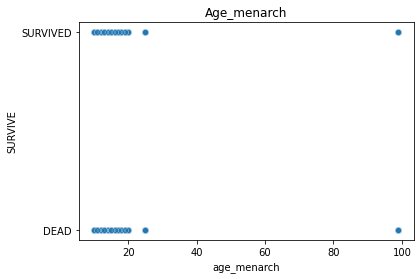

In [ ]:
sns.scatterplot(x = 'age_menarch',
            y = 'SURVIVE',
            alpha = 0.3,
            data = df_age)
plt.title('Age_menarch')
plt.show()

In [ ]:
breast_total_fixed = breast_total.copy()
breast_total_fixed

,No,AGE,inductal carcinoma,infiltrating duct carcinoma,adenocarcinoma,lobular carcinoma,Metaplastic carcinoma,TX,T0,T1,T1mi,T1a,T1b,T1c,T2,T2a,T2b,T3,T4,Nx,N1mi,N1,N1a,N1b,N1c,N2,N2a,N2b,N3,N3a,N3b,N3c,M1,M1a,M1b,Type of Drink,Smoke,Age of Menarch,Age of Menopause,Marriage,Age at first birth,Number of births,COCP,HRT,Height,Weight,BRCA1 PVs,BRCA1 VUS,BRCA2 PVs,BRCA2 VUS,ER,PR,AR,BCS,Mestectomy,pan hysterosalpingo oophorectomy,Chemotherapy,Hormone therapy,Radiation Therapy,Death,Survival period
0,0,33,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,13,48,99,21,1,99,1,152.4,60.6,99,1,1,1,2,2,9,1,99,0,1,0,1,0,472
1,1,72,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,16,52,99,26,5,99,0,162.2,61.3,99,99,99,99,1,1,99,1,0,0,0,1,1,0,835
2,2,41,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,13,46,99,99,99,0,99,150.0,70.6,1,2,2,2,2,99,9,99,1,0,1,1,0,1,1136
3,3,61,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,15,53,99,20,5,0,1,148.1,68.1,99,2,99,99,2,1,99,99,0,0,0,1,1,1,145
4,4,44,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,20,37,1,28,2,99,0,171.0,68.5,99,99,99,2,1,2,99,0,99,0,0,1,1,1,906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,4995,56,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,18,49,0,22,4,0,0,159.2,83.4,99,99,99,99,1,1,99,1,0,0,1,1,1,0,145
14996,4996,65,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,99,53,0,23,5,99,1,155.6,63.7,1,2,99,99,1,1,2,1,0,0,1,1,1,1,1360
14997,4997,44,0,1,0,0,1,0,0,1,1,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,99,0,16,53,1,20,99,0,0,143.3,44.4,99,1,99,1,2,1,9,1,0,1,1,0,1,0,67
14998,4998,58,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,99,51,99,40,5,0,0,149.9,50.3,1,99,99,99,1,2,9,1,99,1,0,1,0,0,133


In [ ]:
#15세 미만/이상 초경 시작 환자들의 평균 생존일수, 편차

days_avg = []
days_std = []

days_avg.append(breast_total_fixed[(breast_total_fixed['Age of Menarch']<15)]['Survival period'].mean())
days_avg.append(breast_total_fixed[(breast_total_fixed['Age of Menarch']>=15)]['Survival period'].mean())

days_std.append(breast_total_fixed[(breast_total_fixed['Age of Menarch']<15)]['Survival period'].std())
days_std.append(breast_total_fixed[(breast_total_fixed['Age of Menarch']>=15)]['Survival period'].std())

In [ ]:
days_avg

[841.9032543332154, 849.3053712818318]

In [ ]:
days_std

[469.50779148187064, 464.7041372774957]

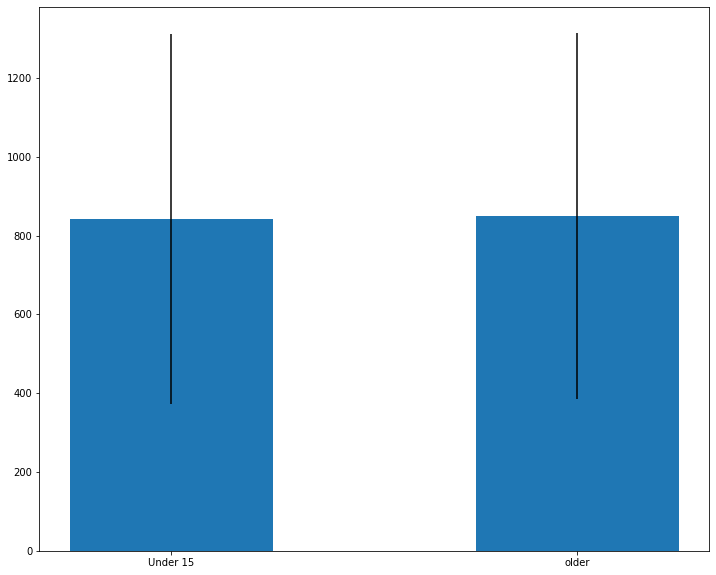

In [ ]:
x_axis = ["Under 15","older"]

plt.figure(figsize=(12,10))

plt.bar(x_axis,days_avg,yerr=days_std, width=0.5)
plt.xticks(x_axis)

plt.show()

###가설 1-2

54세 이후 폐경 경험 시 사망인 경우가 많을 것이다. '암진단후생존일수'가 짧을 것이다.

In [ ]:
bins = [0,20,30,40,50,60,70,80,90]
df_age = pd.DataFrame()
df_age['age_menopause'] = breast_x['Age of Menopause']

df_age['SURVIVE'] = breast_death.map({0:"SURVIVED", 1:"DEAD"})
df_age['PERIOD'] = breast_survival
df_age

,age_menopause,SURVIVE,PERIOD
0,60,SURVIVED,246
1,60,SURVIVED,980
2,49,DEAD,1283
3,36,SURVIVED,995
4,22,SURVIVED,339
...,...,...,...
14995,51,SURVIVED,1069
14996,34,SURVIVED,655
14997,48,DEAD,718
14998,52,DEAD,1029


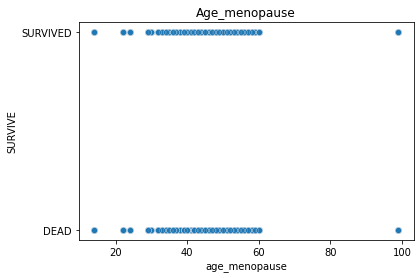

In [ ]:
sns.scatterplot(x = 'age_menopause',
            y = 'SURVIVE',
            alpha = 0.3,
            data = df_age)

plt.title('Age_menopause')
plt.show()

##가설 2

경구피임약 사용 시, 사망인 경우가 많을 것이다. '암진단후생존일수'가 짧을 것이다.

-> 결론: 경구피임약을 사용했을 때의 사망 확률이 더 높음

In [ ]:
df_cocp = pd.DataFrame()
df_cocp['COCP'] = breast_x['COCP'].map({0:"미사용",1:"사용",99:"기타"})

df_cocp['SURVIVE'] = breast_death.map({0:"SURVIVED", 1:"DEAD"})
df_cocp['PERIOD'] = breast_survival
df_cocp

,COCP,SURVIVE,PERIOD
0,기타,SURVIVED,246
1,사용,SURVIVED,980
2,미사용,DEAD,1283
3,미사용,SURVIVED,995
4,기타,SURVIVED,339
...,...,...,...
14995,기타,SURVIVED,1069
14996,사용,SURVIVED,655
14997,미사용,DEAD,718
14998,미사용,DEAD,1029


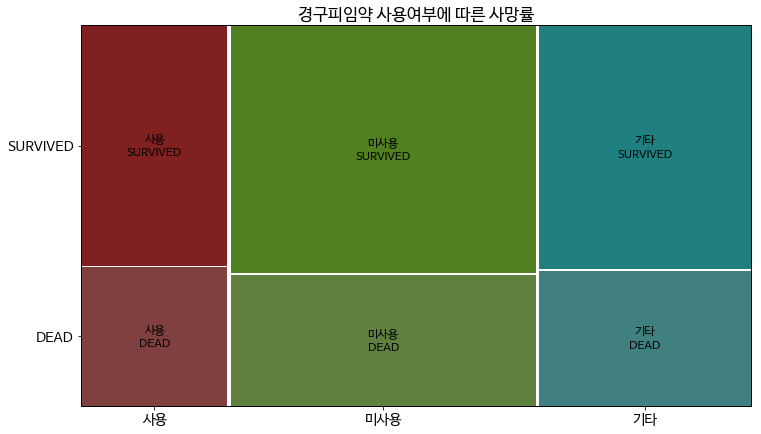

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

mosaic(df_cocp.sort_values('COCP',ascending=False),['COCP','SURVIVE'],
       title = '경구피임약 사용여부에 따른 사망률')
plt.show()
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font',family = 'NanumBarunGothic', size=14)